# GRIP Task #2 : Prediction using Unsupervised Machine Learning

## Project by M Premika

### Aim

To predict the optimum number of clusters from Iris dataset and represent it visually

### Dataset

The dataset contains the information about iris, a flowering plant. This dataset contains five columns such as sepal length (in cm), sepal width (in cm), petal length (in cm), petal width (in cm) and the type of the species.

In [1]:
# To import the library packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To read the csv file 

iris_df = pd.read_csv('Iris.csv')

In [3]:
# To see the first 5 rows of the dataset

iris_df.head(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# To know the summary of the dataset

iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# To find out information about the dataset

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# To remove the column 'Id'

iris_df.drop('Id',axis=1,inplace=True)

From the above information, we can see that there are no null values in our dataset.

### Exploratory data analysis

In this method, we will summarize the main characteristics visually. 

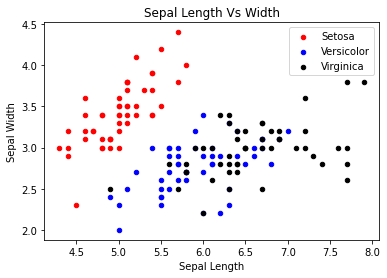

In [7]:
# Sepal length vs width 

fig = iris_df[iris_df.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Setosa')
iris_df[iris_df.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris_df[iris_df.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='black', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')
plt.show()

Text(0.5, 1.0, 'Petal Length Vs Width')

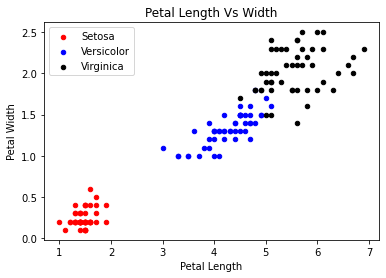

In [8]:
# Petal length vs width

fig = iris_df[iris_df.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Setosa')
iris_df[iris_df.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris_df[iris_df.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='black', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

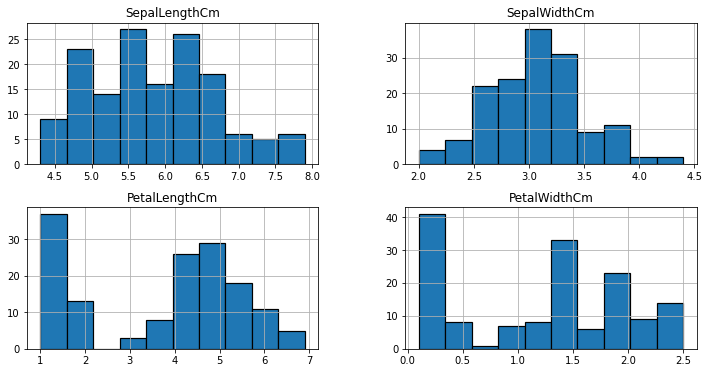

In [9]:
iris_df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

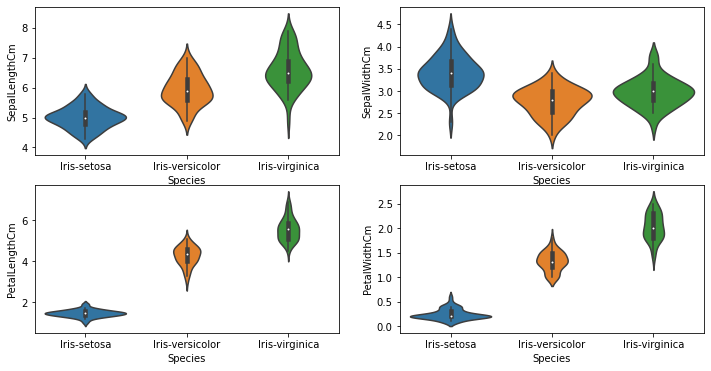

In [10]:
# To plot violin plots

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris_df)

plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris_df)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris_df)

plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris_df)

### Multivariate analysis

Pair plot is used to visualize the relationship between each type of column variable.

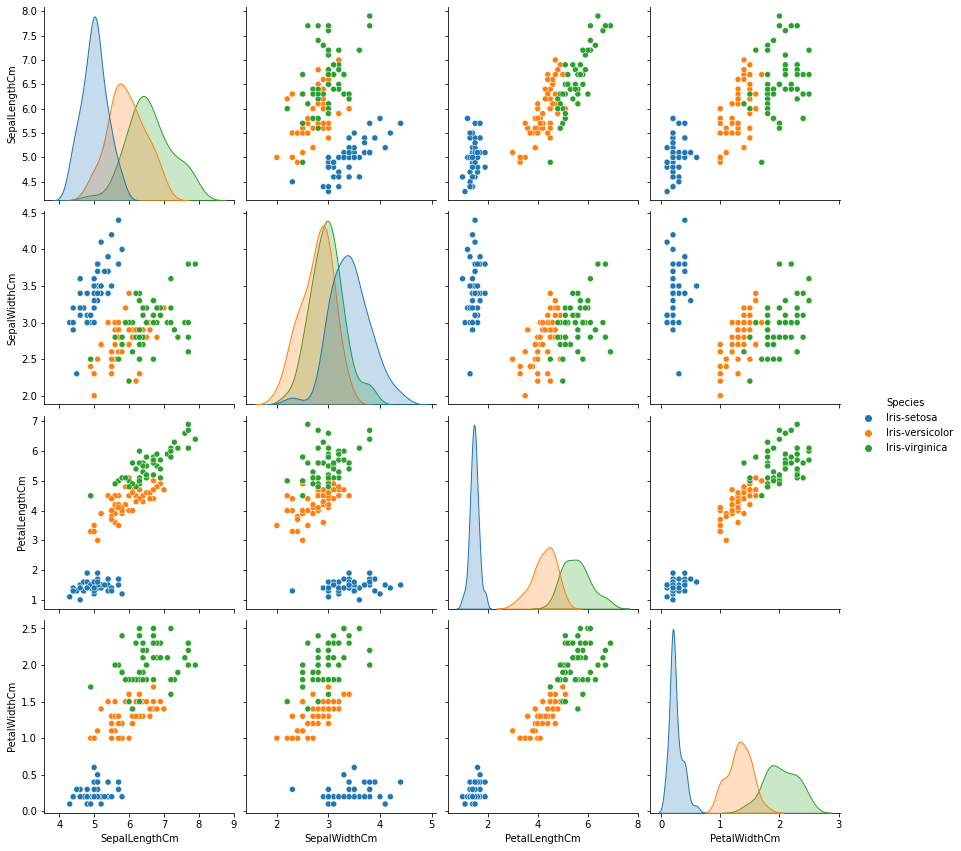

In [11]:
sns.pairplot(iris_df,hue='Species',height=3)
plt.show()

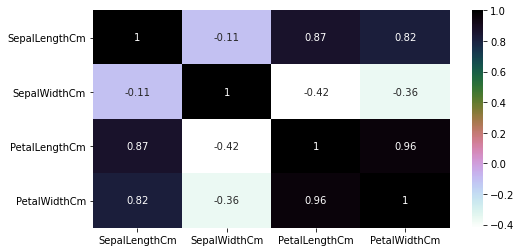

In [12]:
# To draw a heatmap with input as correlation matrix 

plt.figure(figsize=(8,4))
sns.heatmap(iris_df.corr(), annot=True, cmap='cubehelix_r') 
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated. 

In [13]:
# To import K means clustering  

from sklearn.cluster import KMeans

In [14]:
# To find the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

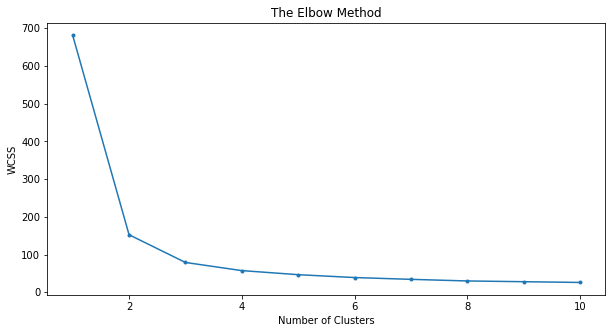

In [15]:
# To plot the results in a line graph and find the 'elbow'

plt.plot(range(1, 11), wcss,marker='.')    
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

From the above graph, we can clearly see why it is called 'The elbow method'. The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
Thus the number of clusters is 3.

In [16]:
# To create k-means classifier 

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

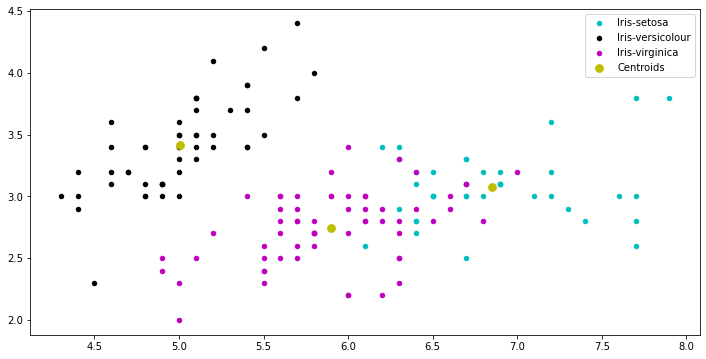

In [17]:
# To visualise the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'c', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'k', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'm', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 60, c = 'y', label = 'Centroids')

fig = plt.gcf()
fig.set_size_inches(12,6)
plt.legend(loc='best')

### Conclusion

The optimum number of clusters is 3.